In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your data
on_base = pl.scan_parquet("../data/throw_home_runner_on_third_wide_sprint_arm.parquet")

on_base = on_base.with_columns(
    pl.when(pl.col("event_type").is_in(["sac_fly", "sac_fly_double_play"]))
    .then(pl.lit(1))
    .otherwise(pl.lit(0))
    .alias("is_successful")
)

# Select relevant columns and drop nulls
on_base = on_base.select([
    "distance_traveled_fielder",
    "distance_catch_to_home",
    "distance_to_home_diff",
    "seconds_since_hit_085_mlb_person_id_R3",
    "max_arm_strength_fielder_mlb_person_id",
    "is_successful"
]).drop_nulls().collect()

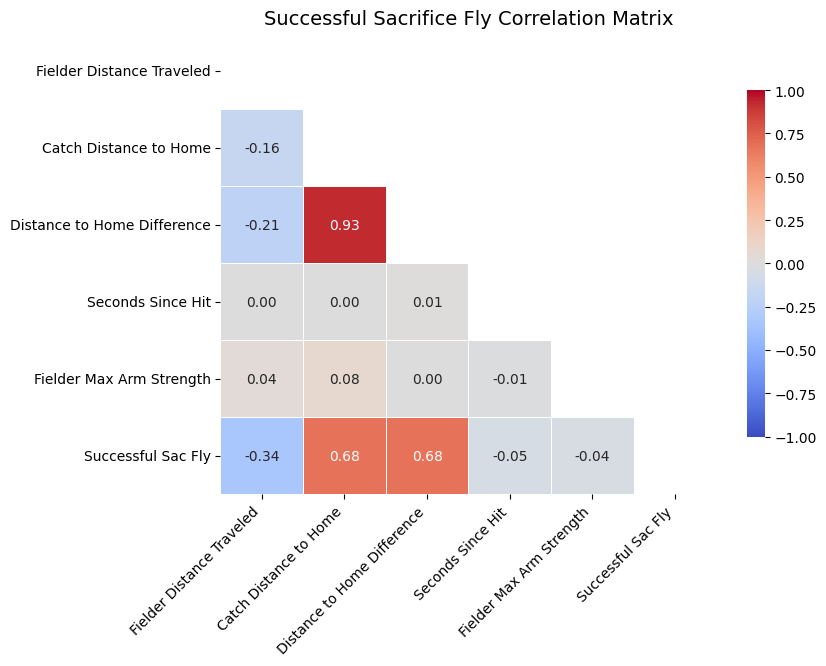

In [3]:
# Calculate the correlation matrix and convert to Pandas
on_base_corr = on_base.to_pandas().corr()

# Create a mask to hide the upper triangle
mask = np.zeros_like(on_base_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Improve column names for readability (optional but recommended)
readable_labels = {
    "distance_traveled_fielder": "Fielder Distance Traveled",
    "distance_traveled_all_fielders": "All Fielders Distance Traveled",
    "distance_catch_to_home": "Catch Distance to Home",
    "distance_to_home_diff": "Distance to Home Difference",
    "seconds_since_hit_085_mlb_person_id_R3": "Seconds Since Hit",
    "max_arm_strength_fielder_mlb_person_id": "Fielder Max Arm Strength",
    "is_successful": "Successful Sac Fly"
}
on_base_corr.rename(index=readable_labels, columns=readable_labels, inplace=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(on_base_corr,
            mask=mask,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            annot=True,
            fmt=".2f",
            linewidths=.5,
            cbar_kws={"shrink": .75})
plt.title('Successful Sacrifice Fly Correlation Matrix', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# plt.tight_layout()
plt.show()

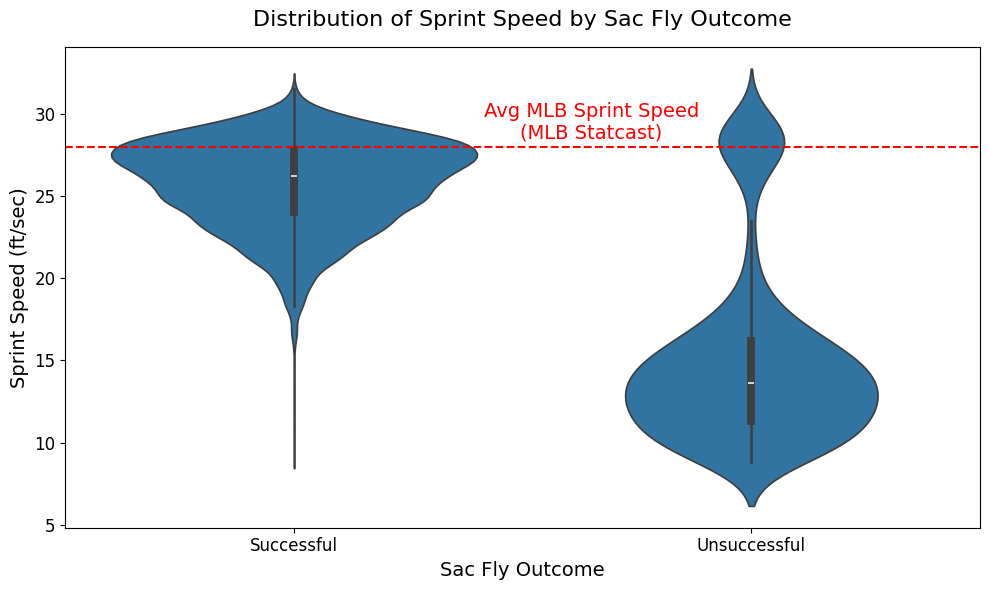

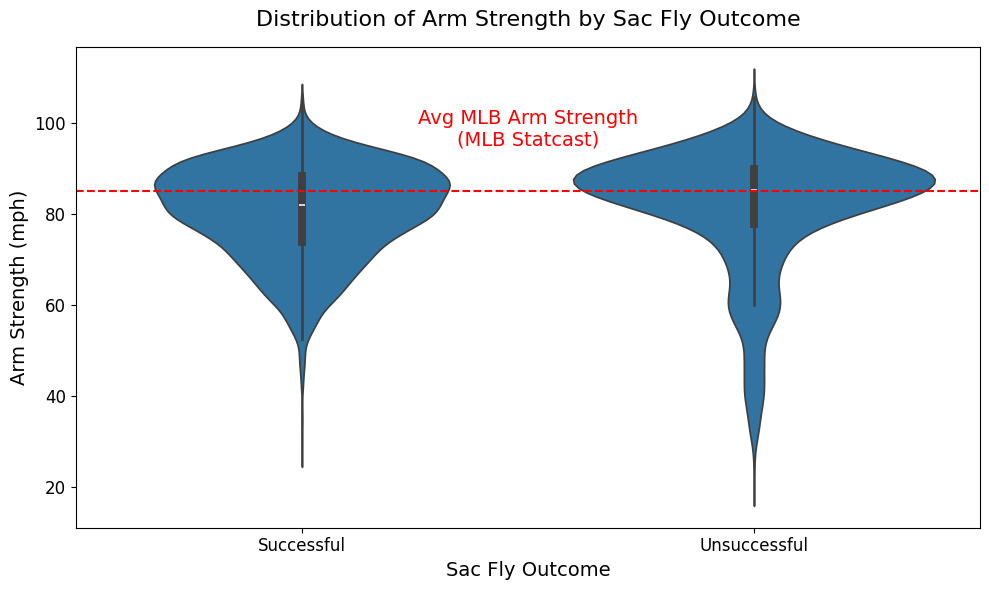